# <!-- TITLE --> NOTEBOOK 2 - Physics Informed Neural Networks : taux d'apprentissage

#### Les étapes principales de ce Notebook :
 - Etape 1 - Initialisation et lancement des **piles logiciels** ;
 - Etape 2 - Etude pour l'optimisateur **ADAM** ;
 - Etape 3 - Etude pour l'optimisateur **L-BFGS** ;
 - Etape 4 - Etude pour l'optimisateur **ADAM + L-BFGS**.

## Etape 1 -  Piles logicielles
Dans un premier temps, nous allons lancer toutes les piles logicielles nécessaires au bon fonctionnement de ce notebook et des commandes utilisées.

In [1]:
######################################
# Pour le fonctionnement du notebook #
######################################
import pandas as pd

####################
# Pour l'affichage #
####################
%matplotlib widget
import matplotlib.pyplot as plt

## Etape 2 - Etude pour l'optimisateur ADAM

In [2]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\10.csv')
Courbe_1.columns = ['Epoques','Perte']
Courbe_01 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\1.csv')
Courbe_01.columns = ['Epoques','Perte']
Courbe_001 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\01.csv')
Courbe_001.columns = ['Epoques','Perte']
Courbe_0001 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\001.csv')
Courbe_0001.columns = ['Epoques','Perte']
Courbe_000075 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\00075.csv')
Courbe_000075.columns = ['Epoques','Perte']
Courbe_00005 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\0005.csv')
Courbe_00005.columns = ['Epoques','Perte']
Courbe_000025 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\00025.csv')
Courbe_000025.columns = ['Epoques','Perte']
Courbe_00001 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM\0001.csv')
Courbe_00001.columns = ['Epoques','Perte']


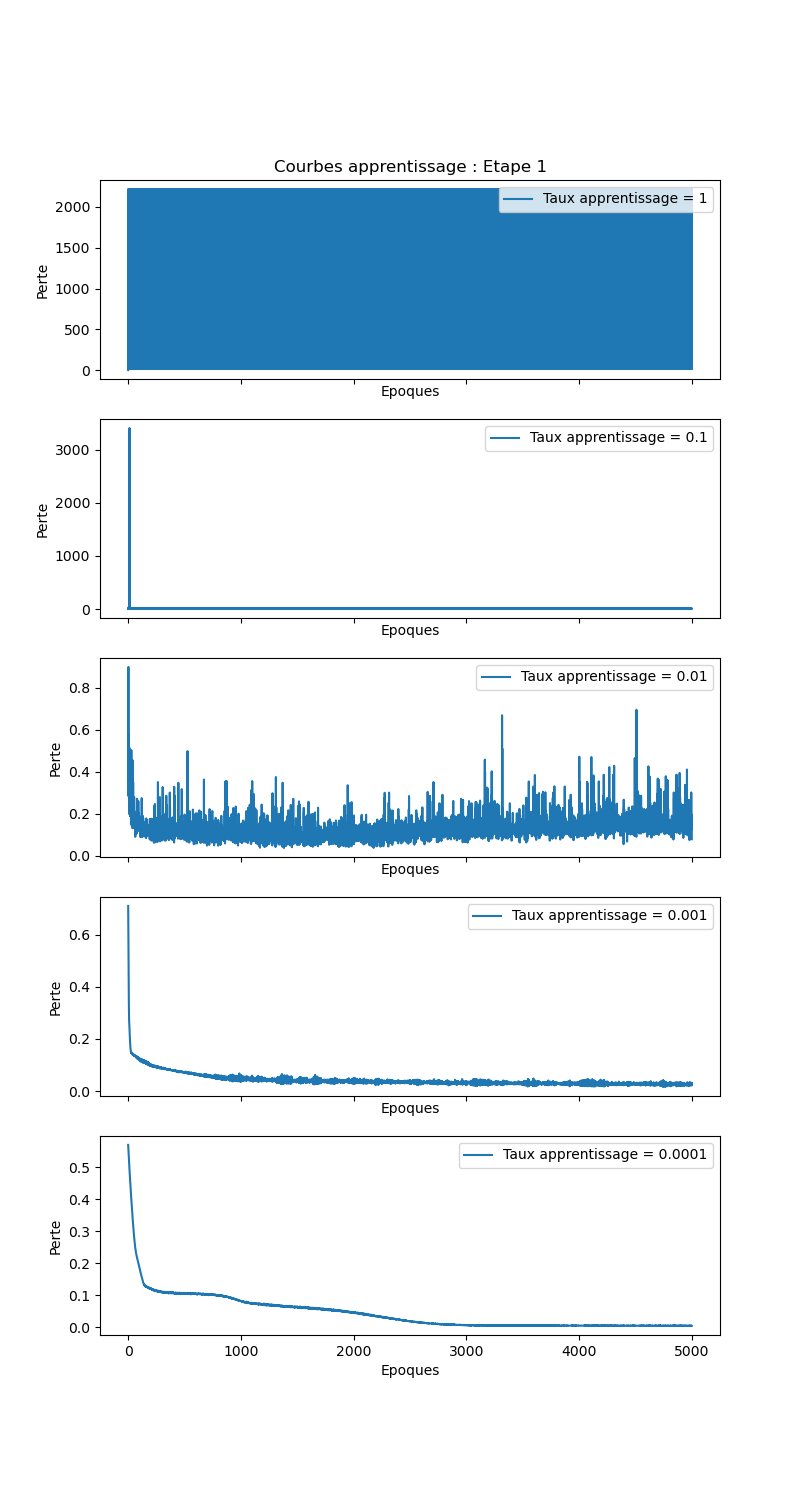

In [3]:
###################################################
# Première étape : lr = [1e0,1e-1,1e-2,1e-3,1e-4] #
###################################################
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, sharey=False, figsize=(8,15))
ax1.plot(Courbe_1.iloc[:,0].values, Courbe_1.iloc[:,1:2].values, label='Taux apprentissage = 1')
ax1.legend(loc="upper right")
ax1.set_xlabel('Epoques')
ax1.set_ylabel('Perte')
ax2.plot(Courbe_1.iloc[:,0].values, Courbe_01.iloc[:,1:2].values, label='Taux apprentissage = 0.1')
ax2.legend(loc="upper right")
ax2.set_xlabel('Epoques')
ax2.set_ylabel('Perte')
ax3.plot(Courbe_1.iloc[:,0].values, Courbe_001.iloc[:,1:2].values, label='Taux apprentissage = 0.01')
ax3.legend(loc="upper right")
ax3.set_xlabel('Epoques')
ax3.set_ylabel('Perte')
ax4.plot(Courbe_1.iloc[:,0].values, Courbe_0001.iloc[:,1:2].values, label='Taux apprentissage = 0.001')
ax4.legend(loc="upper right")
ax4.set_xlabel('Epoques')
ax4.set_ylabel('Perte')
ax5.plot(Courbe_1.iloc[:,0].values, Courbe_00001.iloc[:,1:2].values, label='Taux apprentissage = 0.0001')
ax5.legend(loc="upper right")
ax5.set_xlabel('Epoques')
ax5.set_ylabel('Perte')
ax1.set_title("Courbes apprentissage : Etape 1")
plt.show()

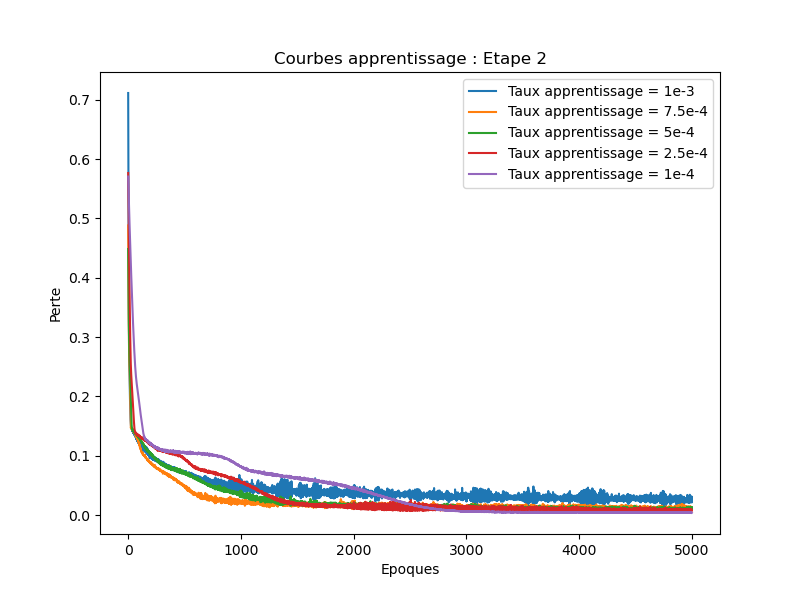

In [4]:
#####################################
# Deuxième étape : lr = [1e-3;1e-4] #
#####################################
fig2 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Courbes apprentissage : Etape 2")
line1, = plt.plot(Courbe_1.iloc[:,0],Courbe_0001.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1.iloc[:,0],Courbe_000075.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1.iloc[:,0],Courbe_00005.iloc[:,1:2].values)
line4, = plt.plot(Courbe_1.iloc[:,0],Courbe_000025.iloc[:,1:2].values)
line5, = plt.plot(Courbe_1.iloc[:,0],Courbe_00001.iloc[:,1:2].values)
plt.legend([line1, line2, line3, line4, line5],['Taux apprentissage = 1e-3','Taux apprentissage = 7.5e-4','Taux apprentissage = 5e-4','Taux apprentissage = 2.5e-4','Taux apprentissage = 1e-4'])
plt.show()

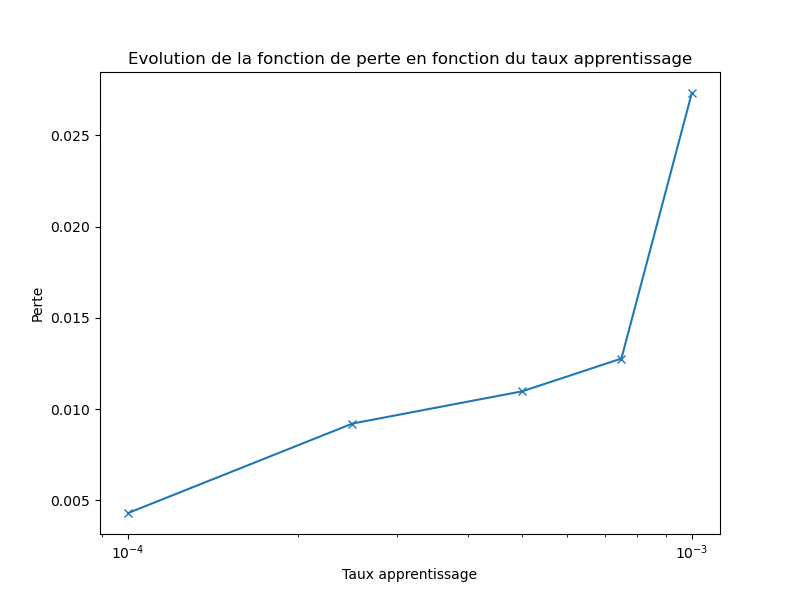

In [5]:
#############################################
# Troisième étape : perte en fonction de lr #
#############################################
# Liste des learning rate
Learning_Rate=[1e-3,7.5e-4,5e-4,2.5e-4,1e-4]
# On fait une moyenne de la fonction de perte sur les 1000 dernières itérations
Perte_1e_3 = sum(Courbe_0001.iloc[4000:5000,1:2].values)/1000
Perte_7_5e_4 = sum(Courbe_000075.iloc[4000:5000,1:2].values)/1000
Perte_5e_4 = sum(Courbe_00005.iloc[4000:5000,1:2].values)/1000
Perte_2_5e_4 = sum(Courbe_000025.iloc[4000:5000,1:2].values)/1000
Perte_1e_4 = sum(Courbe_00001.iloc[4000:5000,1:2].values)/1000
# Liste des valeurs de la fonction de perte
Perte = [Perte_1e_3,Perte_7_5e_4,Perte_5e_4,Perte_2_5e_4,Perte_1e_4]
# On trace la figure
fig3 = plt.figure(figsize=(8,6))
plt.xlabel("Taux apprentissage")
plt.ylabel("Perte")
plt.title("Evolution de la fonction de perte en fonction du taux apprentissage")
line1, = plt.plot(Learning_Rate,Perte,'-x')
plt.xscale('log')
plt.show()

## Etape 3 - Etude pour l'optimisateur L-BFGS

In [6]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\1.csv')
Courbe_1.columns = ['Epoques','Perte']
Courbe_01 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\01.csv')
Courbe_01.columns = ['Epoques','Perte']
Courbe_001 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\001.csv')
Courbe_001.columns = ['Epoques','Perte']
Courbe_0001 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\0001.csv')
Courbe_0001.columns = ['Epoques','Perte']
Courbe_008 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\008.csv')
Courbe_008.columns = ['Epoques','Perte']
Courbe_0075 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\0075.csv')
Courbe_0075.columns = ['Epoques','Perte']
Courbe_005 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\005.csv')
Courbe_005.columns = ['Epoques','Perte']
Courbe_0025 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\L_BFGS\0025.csv')
Courbe_0025.columns = ['Epoques','Perte']

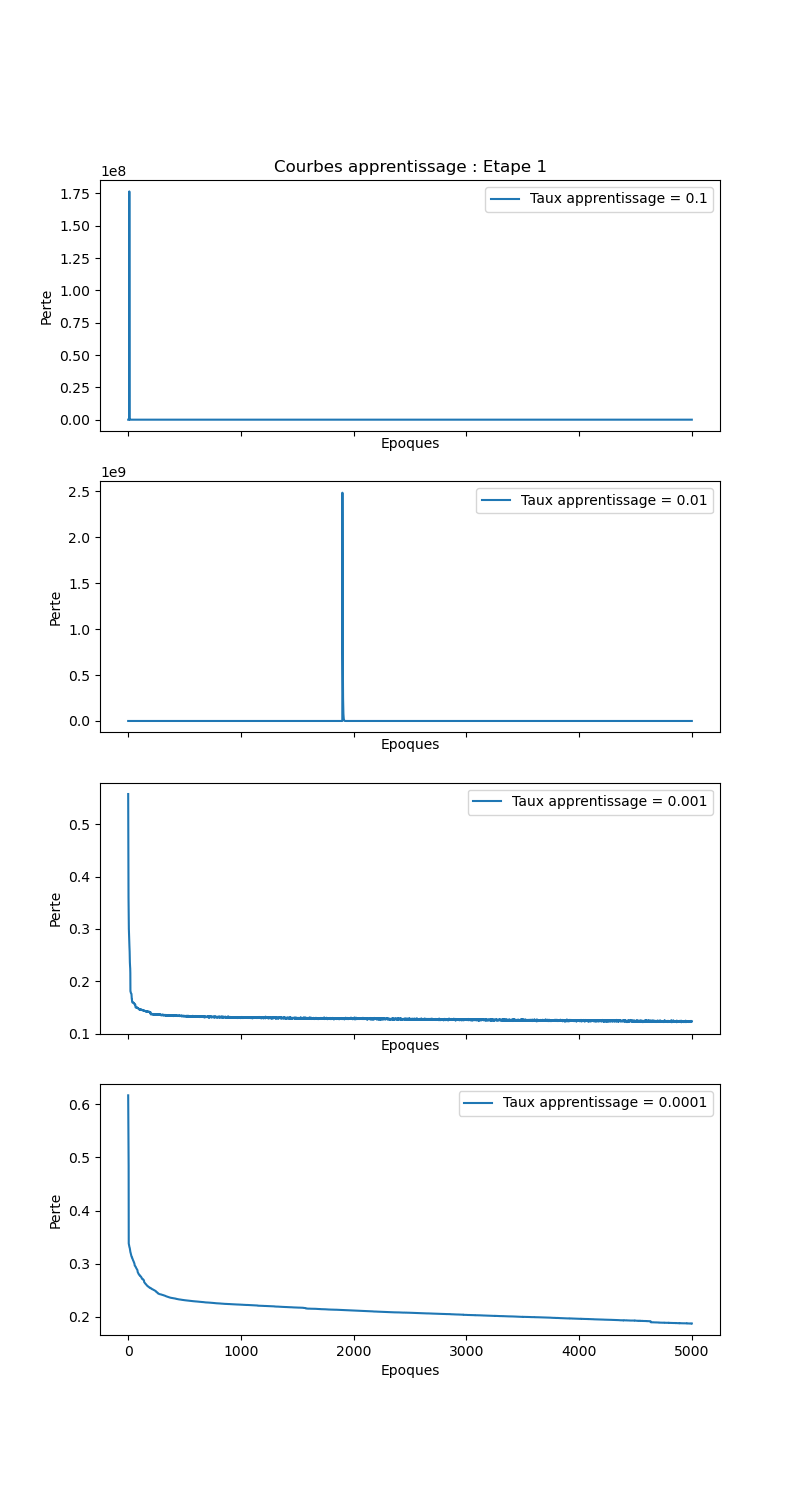

In [7]:
###############################################
# Première étape : lr = [1e-1,1e-2,1e-3,1e-4] #
###############################################
fig4, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False, figsize=(8,15))
ax1.plot(Courbe_1.iloc[:,0].values, Courbe_1.iloc[:,1:2].values, label='Taux apprentissage = 0.1')
ax1.legend(loc="upper right")
ax1.set_xlabel('Epoques')
ax1.set_ylabel('Perte')
ax2.plot(Courbe_1.iloc[:,0].values, Courbe_01.iloc[:,1:2].values, label='Taux apprentissage = 0.01')
ax2.legend(loc="upper right")
ax2.set_xlabel('Epoques')
ax2.set_ylabel('Perte')
ax3.plot(Courbe_1.iloc[:,0].values, Courbe_001.iloc[:,1:2].values, label='Taux apprentissage = 0.001')
ax3.legend(loc="upper right")
ax3.set_xlabel('Epoques')
ax3.set_ylabel('Perte')
ax4.plot(Courbe_1.iloc[:,0].values, Courbe_0001.iloc[:,1:2].values, label='Taux apprentissage = 0.0001')
ax4.legend(loc="upper right")
ax4.set_xlabel('Epoques')
ax4.set_ylabel('Perte')
ax1.set_title("Courbes apprentissage : Etape 1")
plt.show()

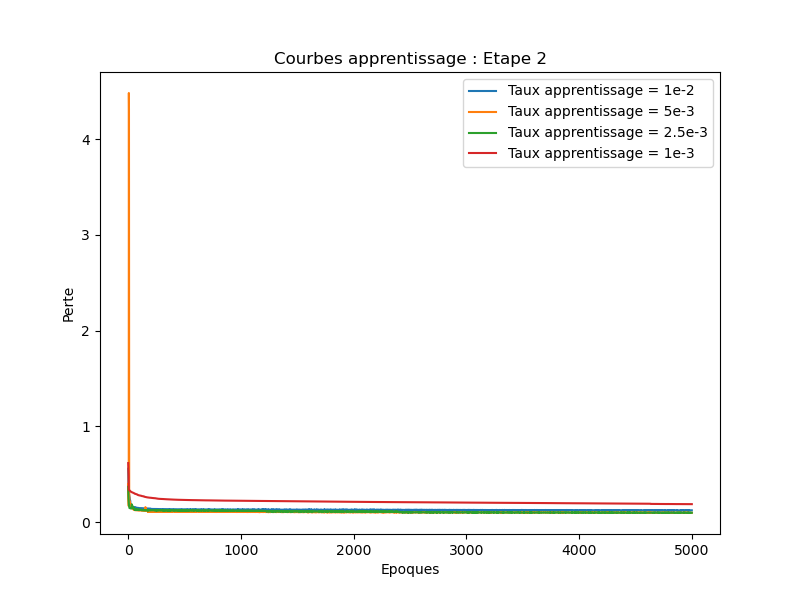

In [8]:
#####################################
# Deuxième étape : lr = [1e-2;1e-3] #
#####################################
fig5 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Courbes apprentissage : Etape 2")
line1, = plt.plot(Courbe_1.iloc[:,0],Courbe_001.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1.iloc[:,0],Courbe_005.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1.iloc[:,0],Courbe_0025.iloc[:,1:2].values)
line4, = plt.plot(Courbe_1.iloc[:,0],Courbe_0001.iloc[:,1:2].values)
plt.legend([line1, line2, line3, line4],['Taux apprentissage = 1e-2','Taux apprentissage = 5e-3','Taux apprentissage = 2.5e-3','Taux apprentissage = 1e-3'])
plt.show()

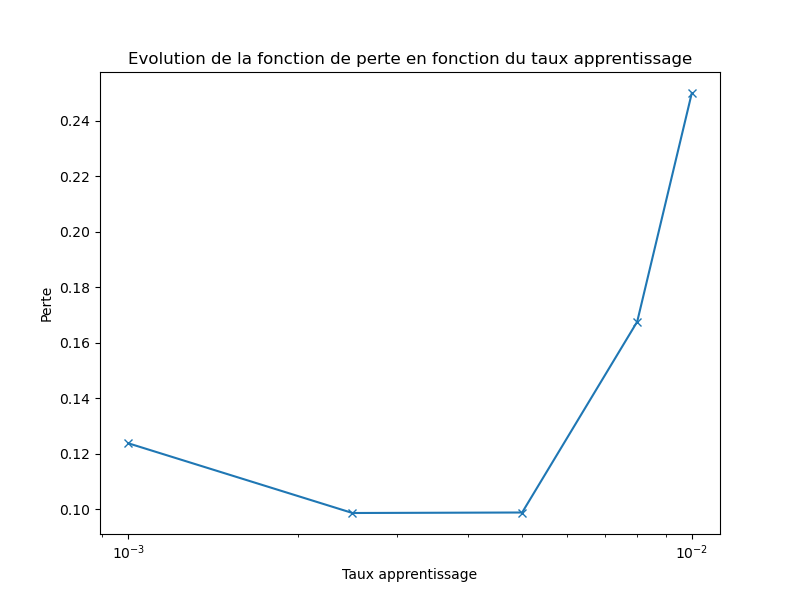

In [9]:
#############################################
# Troisième étape : perte en fonction de lr #
#############################################
# Liste des learning rate
Learning_Rate=[1e-2,8e-3,5e-3,2.5e-3,1e-3]
# On fait une moyenne de la fonction de perte sur les 1000 dernières itérations
Perte_1e_2 = sum(Courbe_01.iloc[4000:5000,1:2].values)/1000
Perte_8e_3 = sum(Courbe_008.iloc[4000:5000,1:2].values)/1000
Perte_5e_3 = sum(Courbe_005.iloc[4000:5000,1:2].values)/1000
Perte_2_5e_3 = sum(Courbe_0025.iloc[4000:5000,1:2].values)/1000
Perte_1e_3 = sum(Courbe_001.iloc[4000:5000,1:2].values)/1000

# Liste des valeurs de la fonction de perte
Perte = [Perte_1e_2,Perte_8e_3,Perte_5e_3,Perte_2_5e_3,Perte_1e_3]
# On trace la figure
fig6 = plt.figure(figsize=(8,6))
plt.xlabel("Taux apprentissage")
plt.ylabel("Perte")
plt.title("Evolution de la fonction de perte en fonction du taux apprentissage")
line1, = plt.plot(Learning_Rate,Perte,'-x')
plt.xscale('log')
plt.show()

## Etape 4 - Etude pour l'optimisateur ADAM+L-BFGS

In [10]:
##########################################################
# Lecture des fichiers contenant les données des courbes #
##########################################################
Courbe_1 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM_L_BFGS\Dataset_lr_1e-3.csv')
Courbe_1.columns = ['Epoques','Perte']
Courbe_2 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM_L_BFGS\Dataset_lr_2e-3.csv')
Courbe_2.columns = ['Epoques','Perte']
Courbe_2_etendu = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM_L_BFGS\Dataset_lr_2e-3_20000.csv')
Courbe_2_etendu.columns = ['Epoques','Perte']
Courbe_3 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM_L_BFGS\Dataset_lr_3e-3.csv')
Courbe_3.columns = ['Epoques','Perte']
Courbe_4 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM_L_BFGS\Dataset_lr_4e-3.csv')
Courbe_4.columns = ['Epoques','Perte']
Courbe_5 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM_L_BFGS\Dataset_lr_5e-3.csv')
Courbe_5.columns = ['Epoques','Perte']
Courbe_6 = pd.read_csv(r'C:\Users\tangu\Projet\Learning_Rate\Choc\ADAM_L_BFGS\Dataset_lr_6e-3.csv')
Courbe_6.columns = ['Epoques','Perte']

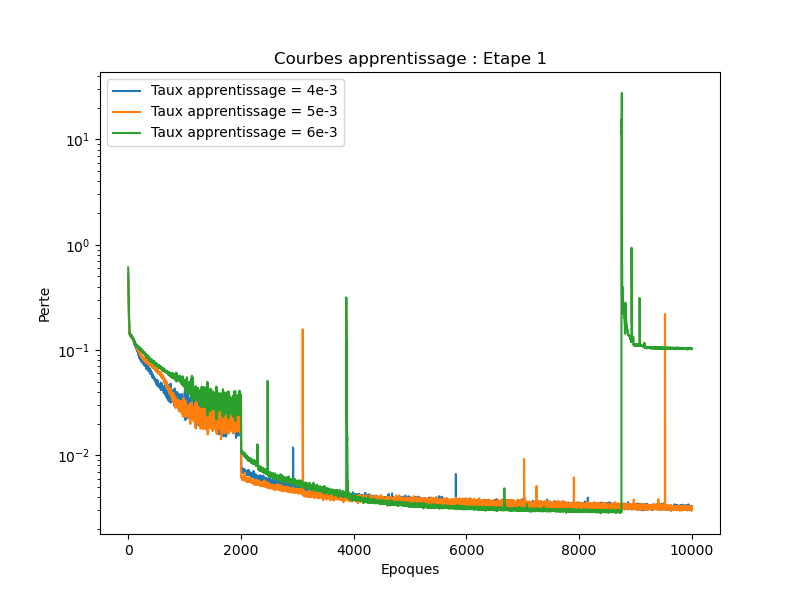

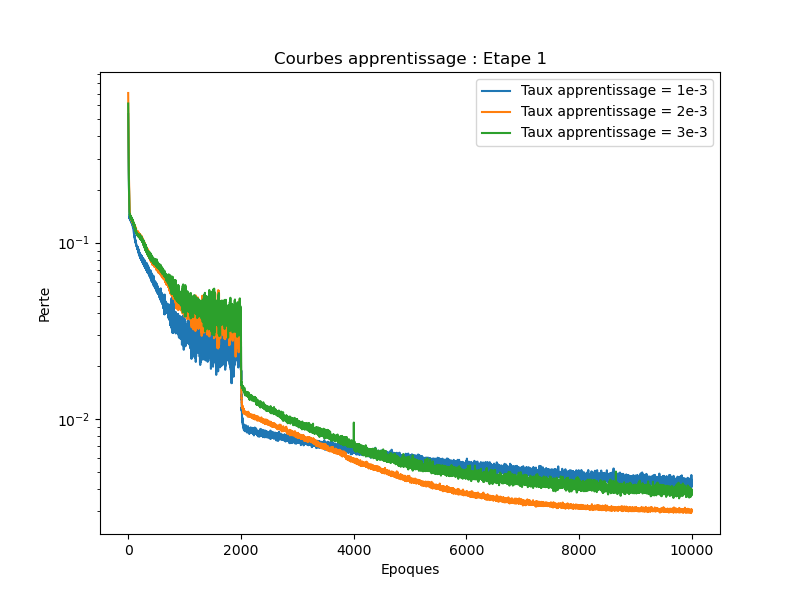

In [11]:
##########################################
# Première étape : lr entre 1e-3 et 6e-3 #
##########################################
fig7 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Courbes apprentissage : Etape 1")
line4, = plt.plot(Courbe_1.iloc[:,0].values, Courbe_4.iloc[:,1:2].values)
line5, = plt.plot(Courbe_1.iloc[:,0].values, Courbe_5.iloc[:,1:2].values)
line6, = plt.plot(Courbe_1.iloc[:,0].values, Courbe_6.iloc[:,1:2].values)
plt.legend([line4, line5, line6],['Taux apprentissage = 4e-3','Taux apprentissage = 5e-3','Taux apprentissage = 6e-3'])
plt.yscale('log')
plt.show()

fig8 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Courbes apprentissage : Etape 1")
line1, = plt.plot(Courbe_1.iloc[:,0].values, Courbe_1.iloc[:,1:2].values)
line2, = plt.plot(Courbe_1.iloc[:,0].values, Courbe_2.iloc[:,1:2].values)
line3, = plt.plot(Courbe_1.iloc[:,0].values, Courbe_3.iloc[:,1:2].values)
plt.legend([line1, line2, line3],['Taux apprentissage = 1e-3','Taux apprentissage = 2e-3','Taux apprentissage = 3e-3'])
plt.yscale('log')
plt.show()

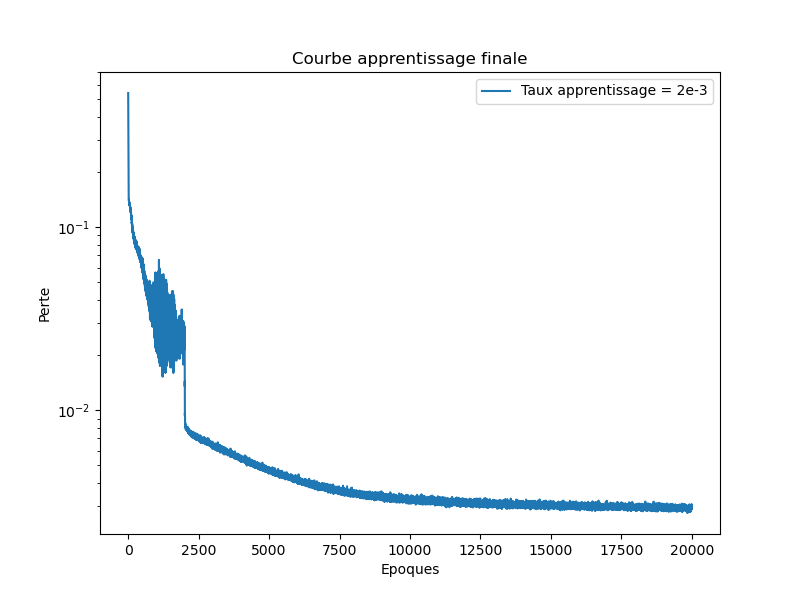

In [12]:
#################################
# Courbe d'apprentissage finale #
#################################
fig8 = plt.figure(figsize=(8,6))
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.title("Courbe apprentissage finale")
line1, = plt.plot(Courbe_2_etendu.iloc[:,0].values, Courbe_2_etendu.iloc[:,1:2].values)
plt.legend([line1],['Taux apprentissage = 2e-3'])
plt.yscale('log')
plt.show()